In [1]:
import pandas as pd
import numpy as np
from experiment import Design, Trial, Message, DynamicProbTrial
from schedules import ProbRatioBlock
from matplotlib import pyplot as plt

pygame 2.1.2 (SDL 2.0.18, Python 3.9.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
my_experiment = Design([
    Message('Press ENTER to start.'),
    DynamicProbTrial(
        [0.1, 0.15, 0.2, 0.25, 0.3, 0.6],
        t=120, warmup=75, inequality_threshold=2.0
    ),
    Message('Press ENTER to exit.')
])

In [ ]:
my_experiment.run()
trial = my_experiment.design[1]
{i+1: trial.schedule_history[i] for i in range(len(trial.schedule_history))}

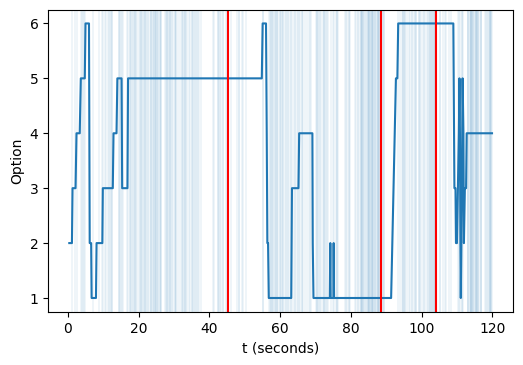

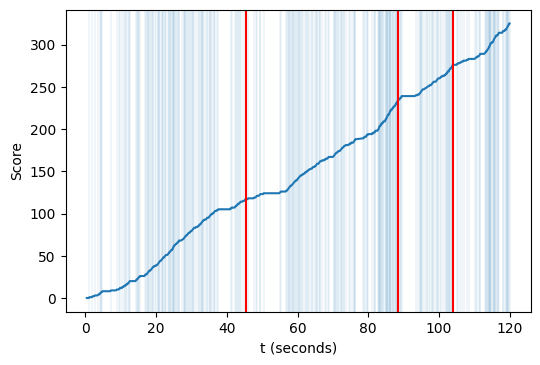

5    195
1    192
6    111
4    104
3     54
2     28
Name: press, dtype: int64

In [5]:
df_log = trial.return_log()
plt.figure(dpi=100)
plt.plot(df_log.time, df_log.press)
plt.yticks([1, 2, 3, 4, 5, 6], ['1', '2', '3', '4', '5', '6'])
plt.ylabel('Option')
for t,reward in zip(df_log.time, df_log.outcome):
    if reward:
        plt.axvline(t, linewidth=0.1)
if len(trial.shift_history) > 1:
    for shift in trial.shift_history[1:]:
        plt.axvline(shift, color='red')
plt.xlabel('t (seconds)')
plt.show()
plt.figure(dpi=100)
plt.plot(df_log.time, np.cumsum(df_log.outcome))
for t,reward in zip(df_log.time, df_log.outcome):
    if reward:
        plt.axvline(t, linewidth=0.1)
if len(trial.shift_history) > 1:
    for shift in trial.shift_history[1:]:
        plt.axvline(shift, color='red')
plt.ylabel('Score')
plt.xlabel('t (seconds)')
plt.show()
df_log.press.value_counts()